<a href="https://colab.research.google.com/github/Drishya24-lab/InsightsHub/blob/main/Budget_sales_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [3]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Extract data from zip file
import zipfile
with zipfile.ZipFile('/content/drive/My Drive/Budget Sales data.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [5]:
# Load the Budget dataset

# Load the Excel file, skipping the first 3 rows
budget_df = pd.read_excel('/content/Budget Sales data/Budget.xlsx', skiprows=3)

# Manually set the column names based on the 4th row (which should be the correct headers)
budget_df.columns = ['Category', 'Subcategory', 'ProductName', 'ProductKey',
                     'Jan 2016', 'Feb 2016', 'Mar 2016', 'Apr 2016',
                     'May 2016', 'Jun 2016', 'Jul 2016', 'Aug 2016',
                     'Sep 2016', 'Oct 2016', 'Nov 2016', 'Dec 2016', 'Grand Total']

# Drop the first row of data if it was included as part of the headers
budget_df = budget_df.drop(0)

# Display the updated columns of budget_df
print(budget_df.columns)



Index(['Category', 'Subcategory', 'ProductName', 'ProductKey', 'Jan 2016',
       'Feb 2016', 'Mar 2016', 'Apr 2016', 'May 2016', 'Jun 2016', 'Jul 2016',
       'Aug 2016', 'Sep 2016', 'Oct 2016', 'Nov 2016', 'Dec 2016',
       'Grand Total'],
      dtype='object')


In [6]:
# Check for missing values in each column
missing_values = budget_df.isnull().sum()
print(missing_values)

# Get a summary of missing values
total_missing = budget_df.isnull().sum().sum()
print("Total missing values:", total_missing)

Category       0
Subcategory    4
ProductName    4
ProductKey     4
Jan 2016       0
Feb 2016       0
Mar 2016       0
Apr 2016       0
May 2016       0
Jun 2016       0
Jul 2016       0
Aug 2016       0
Sep 2016       0
Oct 2016       0
Nov 2016       0
Dec 2016       0
Grand Total    0
dtype: int64
Total missing values: 12


In [7]:
# Fill missing values with a placeholder
budget_df['Subcategory'].fillna('Unknown', inplace=True)
budget_df['ProductName'].fillna('Unknown', inplace=True)
budget_df['ProductKey'].fillna(0, inplace=True)  # Assuming ProductKey is numeric, filling with 0




<ipython-input-7-26a67e707771>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  budget_df['Subcategory'].fillna('Unknown', inplace=True)
<ipython-input-7-26a67e707771>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [8]:

# Create a cleaned copy of the budget DataFrame
cleaned_budget_df = budget_df.copy()
cleaned_budget_df.isnull().sum()

,0
Category,0
Subcategory,0
ProductName,0
ProductKey,0
Jan 2016,0
Feb 2016,0
Mar 2016,0
Apr 2016,0
May 2016,0
Jun 2016,0


In [9]:
# Display the summary of the cleaned DataFrame
print(cleaned_budget_df.describe())

       ProductKey       Jan 2016       Feb 2016       Mar 2016      Apr 2016  \
count   20.000000      20.000000      20.000000      20.000000  2.000000e+01   
mean   318.500000  130611.300000  128620.750000  149762.550000  1.696492e+05   
std    195.549025  272926.495979  255479.034996  299539.574761  3.404172e+05   
min      0.000000      24.000000     244.000000     432.000000  5.470000e+02   
25%    216.500000     649.000000    2631.500000    2853.250000  3.245000e+03   
50%    394.500000    2723.000000    8615.500000   10086.500000  9.072000e+03   
75%    481.000000   44282.000000   80820.500000   85518.750000  1.072962e+05   
max    560.000000  871119.000000  858350.000000  999795.000000  1.131721e+06   

           May 2016      Jun 2016      Jul 2016      Aug 2016      Sep 2016  \
count  2.000000e+01  2.000000e+01  2.000000e+01  2.000000e+01  2.000000e+01   
mean   1.838208e+05  2.568505e+05  2.031266e+05  2.364702e+05  2.259575e+05   
std    3.696194e+05  5.180377e+05  4.08737

In [10]:
# Save cleaned data to a CSV file
cleaned_budget_df.to_csv('cleaned_budget_data.csv', index=False) # Save to a csv file named 'cleaned_budget_data.csv', and don't include the index

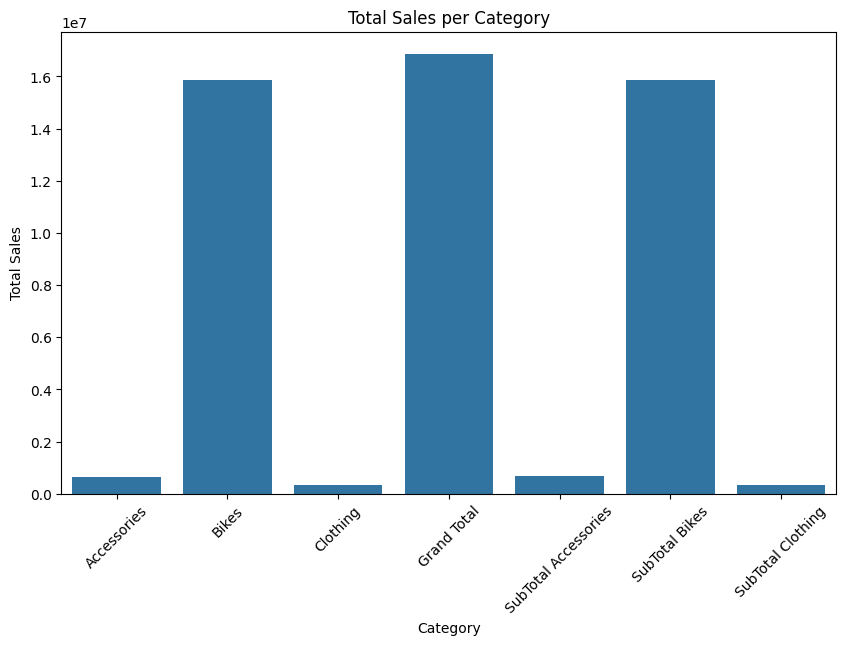

In [11]:
# Data Visualization

# Total sales per category
category_sales =cleaned_budget_df.groupby('Category')['Grand Total'].sum().reset_index()

# Plot total sales per category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Grand Total', data=category_sales)
plt.title('Total Sales per Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


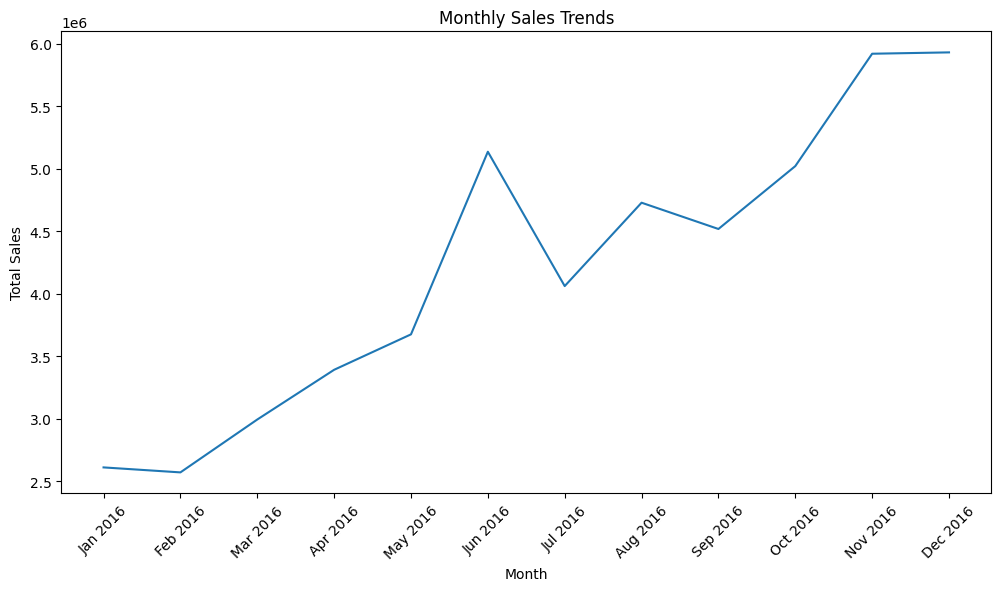

In [12]:
# Monthly sales trends
numeric_columns = ['Jan 2016', 'Feb 2016', 'Mar 2016', 'Apr 2016', 'May 2016', 'Jun 2016', 'Jul 2016', 'Aug 2016', 'Sep 2016', 'Oct 2016', 'Nov 2016', 'Dec 2016']

monthly_sales = cleaned_budget_df[numeric_columns].sum().reset_index() # Use reset_index
monthly_sales.columns = ['Month', 'Total Sales']


plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Total Sales', data=monthly_sales)
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

Sales by Subcategory

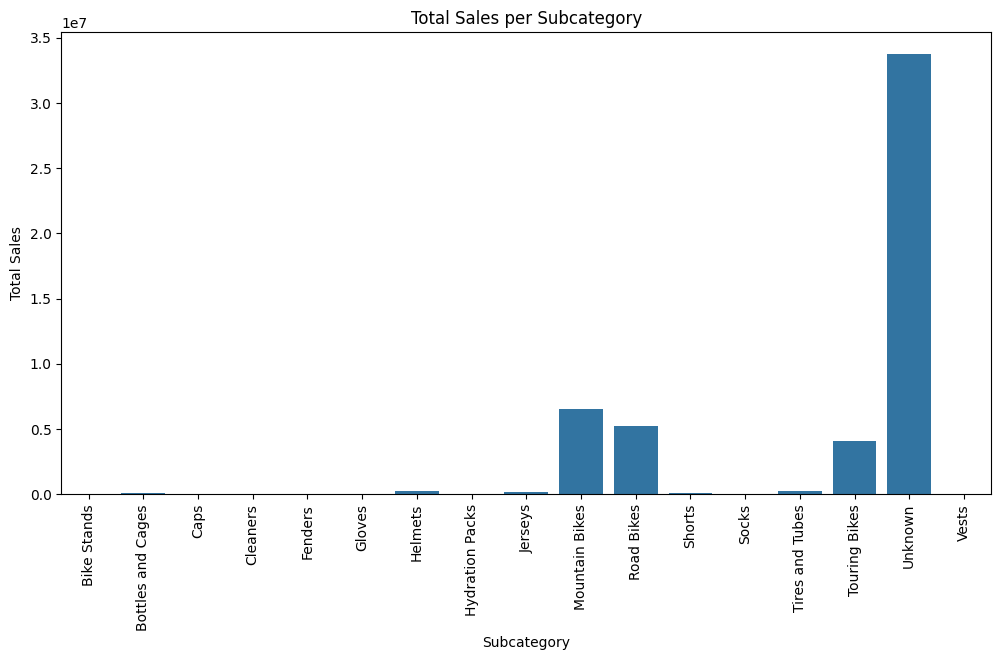

In [13]:
# Total sales per subcategory
subcategory_sales = cleaned_budget_df.groupby('Subcategory')['Grand Total'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Subcategory', y='Grand Total', data=subcategory_sales)
plt.title('Total Sales per Subcategory')
plt.xlabel('Subcategory')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()


In [14]:
# Summary statistics for sales
monthly_totals = cleaned_budget_df[['Jan 2016', 'Feb 2016', 'Mar 2016', 'Apr 2016', 'May 2016', 'Jun 2016',
                            'Jul 2016', 'Aug 2016', 'Sep 2016', 'Oct 2016', 'Nov 2016', 'Dec 2016']].sum()
monthly_averages =cleaned_budget_df[['Jan 2016', 'Feb 2016', 'Mar 2016', 'Apr 2016', 'May 2016', 'Jun 2016',
                              'Jul 2016', 'Aug 2016', 'Sep 2016', 'Oct 2016', 'Nov 2016', 'Dec 2016']].mean()

print("Monthly Totals:\n", monthly_totals)
print("\nMonthly Averages:\n", monthly_averages)


Monthly Totals:
 Jan 2016    2612226
Feb 2016    2572415
Mar 2016    2995251
Apr 2016    3392984
May 2016    3676416
Jun 2016    5137011
Jul 2016    4062533
Aug 2016    4729405
Sep 2016    4519149
Oct 2016    5021967
Nov 2016    5920867
Dec 2016    5931637
dtype: int64

Monthly Averages:
 Jan 2016    130611.30
Feb 2016    128620.75
Mar 2016    149762.55
Apr 2016    169649.20
May 2016    183820.80
Jun 2016    256850.55
Jul 2016    203126.65
Aug 2016    236470.25
Sep 2016    225957.45
Oct 2016    251098.35
Nov 2016    296043.35
Dec 2016    296581.85
dtype: float64


In [15]:
Category and subcategory Analysis
category_totals = cleaned_budget_df.groupby('Category')['Grand Total'].sum()
subcategory_totals = cleaned_budget_df.groupby('Subcategory')['Grand Total'].sum()
category_averages = cleaned_budget_df.groupby('Category')['Grand Total'].mean()
subcategory_averages = cleaned_budget_df.groupby('Subcategory')['Grand Total'].mean()

print("Category Totals:\n", category_totals)
print("\nSubcategory Totals:\n", subcategory_totals)
print("\nCategory Averages:\n", category_averages)
print("\nSubcategory Averages:\n", subcategory_averages)


Category Totals:
 Category
Accessories               650746
Bikes                   15848226
Clothing                  333741
Grand Total             16869574
SubTotal Accessories      687607
SubTotal Bikes          15848226
SubTotal Clothing         333741
Name: Grand Total, dtype: int64

Subcategory Totals:
 Subcategory
Bike Stands             38757
Bottles and Cages       57369
Caps                    20371
Cleaners                 6465
Fenders                 43670
Gloves                  33965
Helmets                221905
Hydration Packs         39803
Jerseys                170938
Mountain Bikes        6534364
Road Bikes            5257897
Shorts                  68453
Socks                    5449
Tires and Tubes        242777
Touring Bikes         4055965
Unknown              33739148
Vests                   34565
Name: Grand Total, dtype: int64

Category Averages:
 Category
Accessories             9.296371e+04
Bikes                   5.282742e+06
Clothing                5.5623

In [16]:
# Product Analysis

known_products_df = cleaned_budget_df[budget_df['ProductName'] != 'Unknown']
top_known_products = known_products_df[['ProductName', 'Grand Total']].sort_values(by='Grand Total', ascending=False).head(10)
print("Top Known Products:\n", top_known_products)

Top Known Products:
                    ProductName  Grand Total
9      Mountain-100 Silver, 38      6534364
10            Road-150 Red, 62      5257897
11       Touring-2000 Blue, 60      4055965
7          Patch Kit/8 Patches       242777
5        Sport-100 Helmet, Red       221905
15  Long-Sleeve Logo Jersey, S       170938
16      Men's Sports Shorts, S        68453
2        Water Bottle - 30 oz.        57369
4        Fender Set - Mountain        43670
6      Hydration Pack - 70 oz.        39803


Adventure Data

In [17]:
# Load the AdventureWorks_Database.xlsx file

adventure_df = pd.read_excel('/content/Budget Sales data/AdventureWorks_Database.xlsx')


In [ ]:
# Summary statistics for AdventureWorks dataset
adventure_df.head(1)
adventure_df.columns
adventure_df.describe()

,Date,DateKey,Year,Quarter,MonthNum,Month,FiscalYear,FiscalQuarter,FiscalMonthNum,FiscalMonth,MonthYear,MonthYearLong,MonthYearNum,WeekdayNum,Weekday,WeekdayWeekend
0,2016-04-03,20160403,2016,Q2,4,Apr,FY2016,FQ4,10,Apr,Apr-16,Apr-2016,201604,1,Sun,Weekend
1,2016-04-04,20160404,2016,Q2,4,Apr,FY2016,FQ4,10,Apr,Apr-16,Apr-2016,201604,2,Mon,Weekday
2,2016-04-05,20160405,2016,Q2,4,Apr,FY2016,FQ4,10,Apr,Apr-16,Apr-2016,201604,3,Tue,Weekday
3,2016-04-06,20160406,2016,Q2,4,Apr,FY2016,FQ4,10,Apr,Apr-16,Apr-2016,201604,4,Wed,Weekday
4,2016-04-07,20160407,2016,Q2,4,Apr,FY2016,FQ4,10,Apr,Apr-16,Apr-2016,201604,5,Thu,Weekday


In [18]:
#checking missing value and saving into a csv file
adventure_df.isnull().sum()
adventure_df.to_csv('adventure_data.csv', index=False)

In [ ]:
adventure_df.to_csv('adventure_data.csv', index=False) # Save to a csv file named 'adventure_data.csv', and don't include the index


Frequency Analysis

In [19]:
# Frequency of data by Year
year_counts = adventure_df['Year'].value_counts()
print("Yearly Counts:\n", year_counts)

# Frequency of data by Month
month_counts = adventure_df['Month'].value_counts()
print("\nMonthly Counts:\n", month_counts)

# Frequency of data by Quarter
quarter_counts = adventure_df['Quarter'].value_counts()
print("\nQuarterly Counts:\n", quarter_counts)

# Frequency of data by Weekday
weekday_counts = adventure_df['Weekday'].value_counts()
print("\nWeekday Counts:\n", weekday_counts)

# Frequency of data by WeekdayWeekend
weekday_weekend_counts = adventure_df['WeekdayWeekend'].value_counts()
print("\nWeekdayWeekend Counts:\n", weekday_weekend_counts)


Yearly Counts:
 Year
2016    366
2015    365
2014    365
2017    365
Name: count, dtype: int64

Monthly Counts:
 Month
Jul    124
Aug    124
Dec    124
Jan    124
Mar    124
May    124
Oct    124
Apr    120
Sep    120
Nov    120
Jun    120
Feb    113
Name: count, dtype: int64

Quarterly Counts:
 Quarter
Q3    368
Q4    368
Q2    364
Q1    361
Name: count, dtype: int64

Weekday Counts:
 Weekday
Sun    209
Wed    209
Thu    209
Fri    209
Sat    209
Mon    208
Tue    208
Name: count, dtype: int64

WeekdayWeekend Counts:
 WeekdayWeekend
Weekday    1043
Weekend     418
Name: count, dtype: int64


Temporal Trends

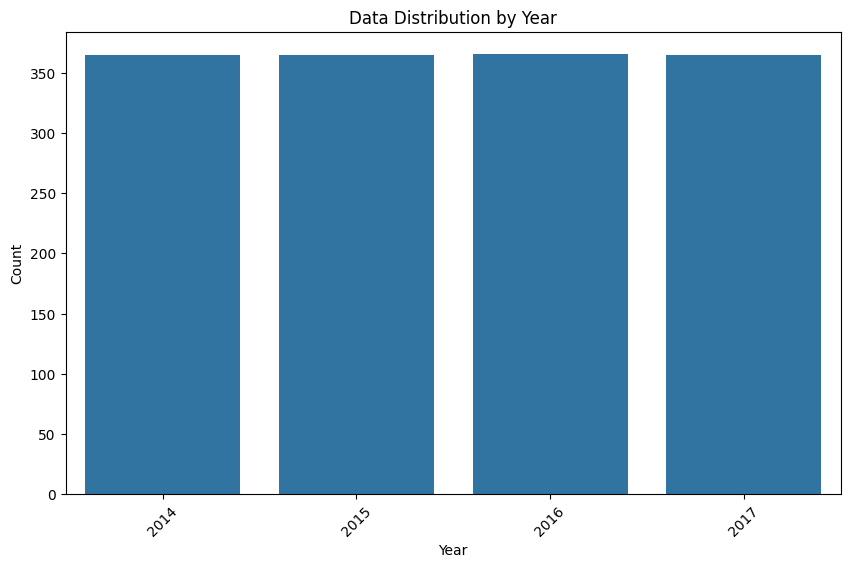

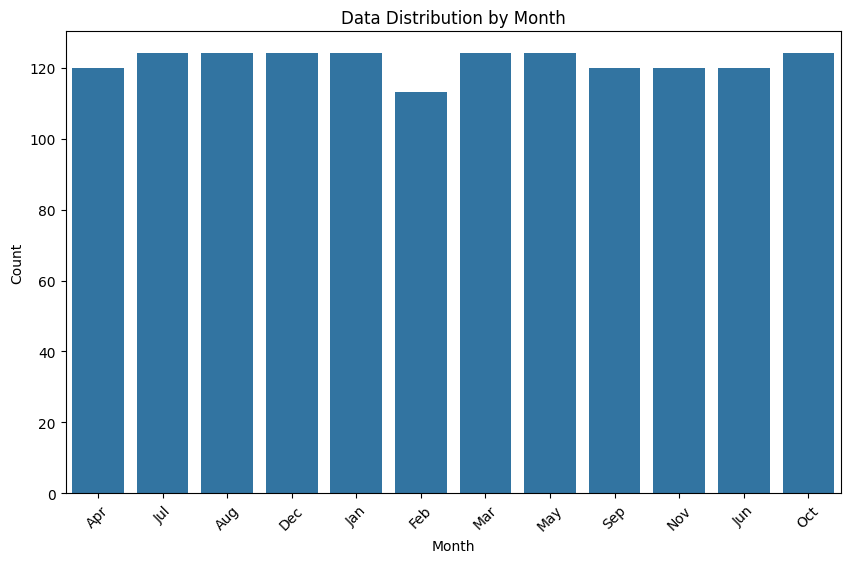

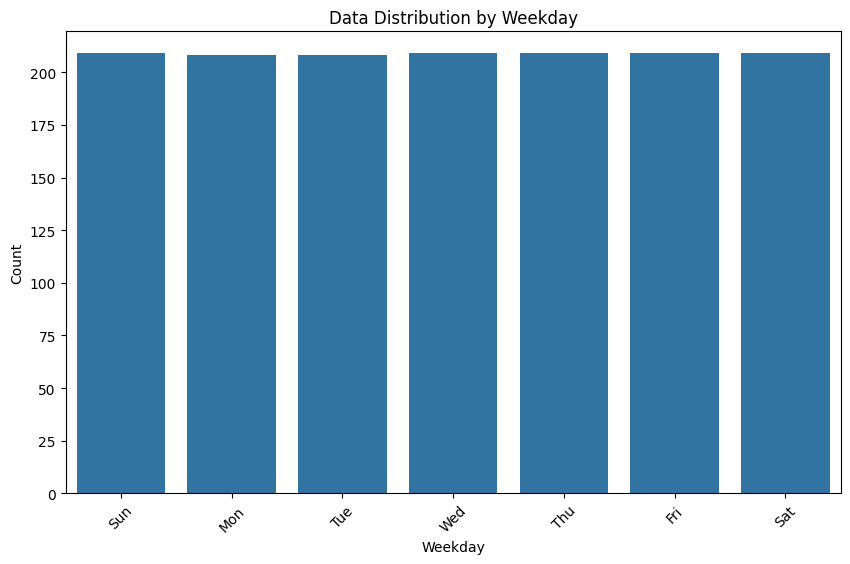

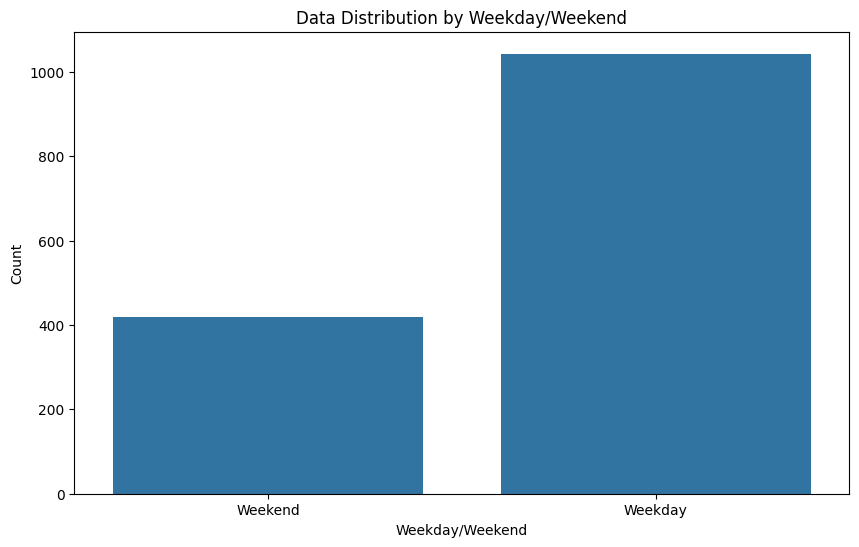

In [20]:


# Distribution over the Year
plt.figure(figsize=(10, 6))
sns.countplot(data=adventure_df, x='Year')
plt.title('Data Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Distribution over the Month
plt.figure(figsize=(10, 6))
sns.countplot(data=adventure_df, x='Month')
plt.title('Data Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Distribution over the Weekday
plt.figure(figsize=(10, 6))
sns.countplot(data=adventure_df, x='Weekday')
plt.title('Data Distribution by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Distribution over WeekdayWeekend
plt.figure(figsize=(10, 6))
sns.countplot(data=adventure_df, x='WeekdayWeekend')
plt.title('Data Distribution by Weekday/Weekend')
plt.xlabel('Weekday/Weekend')
plt.ylabel('Count')
plt.show()


Seasonal Analysis

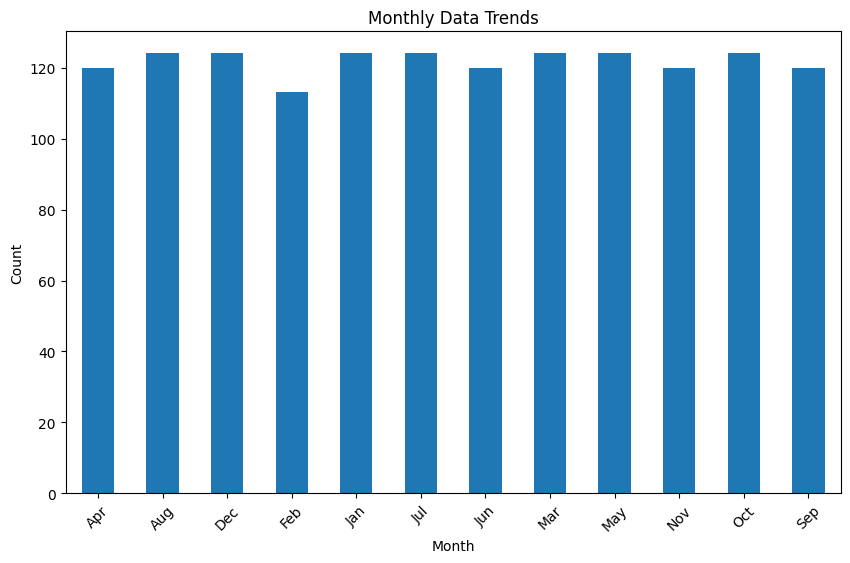

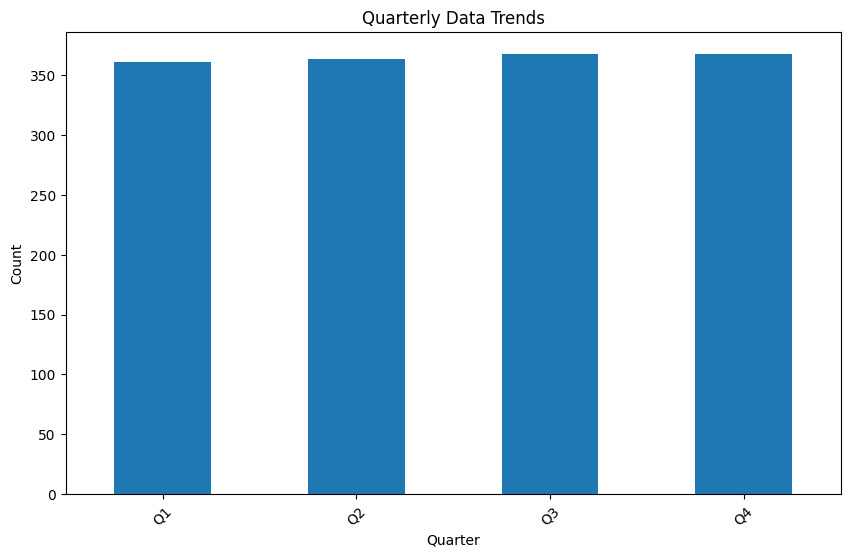

In [36]:
# Grouping data by Month and plotting
monthly_trends = adventure_df.groupby('Month')['Date'].count().sort_index()

plt.figure(figsize=(10, 6))
monthly_trends.plot(kind='bar')
plt.title('Monthly Data Trends')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Grouping data by Quarter and plotting
quarterly_trends = adventure_df.groupby('Quarter')['Date'].count().sort_index()

plt.figure(figsize=(10, 6))
quarterly_trends.plot(kind='bar')
plt.title('Quarterly Data Trends')
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Weekday Vs Weekend Analysis

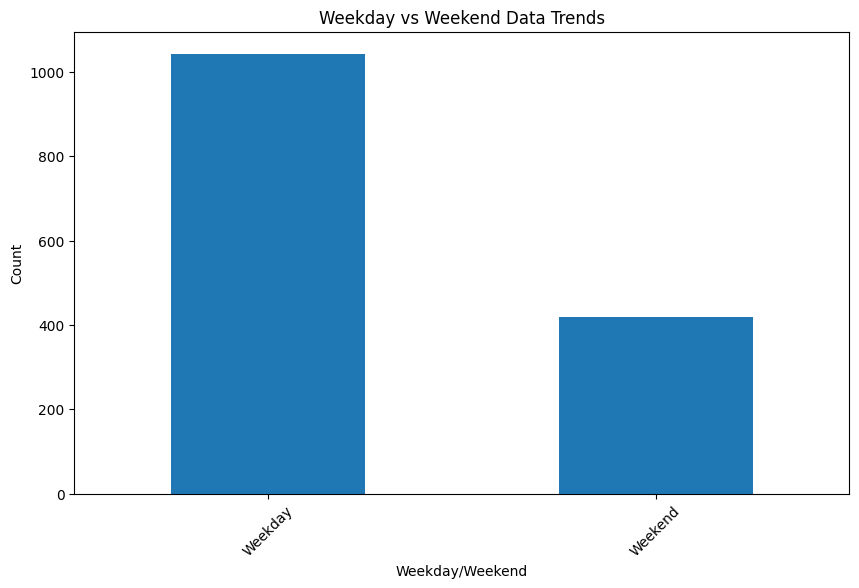

In [21]:
# Grouping data by Weekday/Weekend
weekday_weekend_trends = adventure_df.groupby('WeekdayWeekend')['Date'].count()

plt.figure(figsize=(10, 6))
weekday_weekend_trends.plot(kind='bar')
plt.title('Weekday vs Weekend Data Trends')
plt.xlabel('Weekday/Weekend')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Summary Insights and Key metrics for adventure_df





1.Temporal Trends

In [22]:
#Yearly Analysis

# Distribution by Year
year_counts = adventure_df['Year'].value_counts()
top_years = year_counts.head(5)  # Top 5 years

print("Yearly Distribution of Data:")
print(year_counts)
print("\nTop Years:")
print(top_years)



Yearly Distribution of Data:
Year
2016    366
2015    365
2014    365
2017    365
Name: count, dtype: int64

Top Years:
Year
2016    366
2015    365
2014    365
2017    365
Name: count, dtype: int64


In [23]:
# Quarterly Anlaysis
# Distribution by Quarter
quarter_counts = adventure_df['Quarter'].value_counts()
peak_quarter = quarter_counts.idxmax()  # Most frequent quarter

print("\nQuarterly Distribution of Data:")
print(quarter_counts)
print("\nMost Frequent Quarter:", peak_quarter)



Quarterly Distribution of Data:
Quarter
Q3    368
Q4    368
Q2    364
Q1    361
Name: count, dtype: int64

Most Frequent Quarter: Q3


In [24]:
#Monthly Analysis
# Distribution by Month
month_counts = adventure_df['Month'].value_counts()
peak_month = month_counts.idxmax()  # Most frequent month

print("\nMonthly Distribution of Data:")
print(month_counts)
print("\nMost Frequent Month:", peak_month)



Monthly Distribution of Data:
Month
Jul    124
Aug    124
Dec    124
Jan    124
Mar    124
May    124
Oct    124
Apr    120
Sep    120
Nov    120
Jun    120
Feb    113
Name: count, dtype: int64

Most Frequent Month: Jul


2.Weekday vs Weekend Analysis

In [25]:
#Distribution of data between weekdays and weekends.

# Weekday vs. Weekend Analysis
weekday_counts = adventure_df['WeekdayWeekend'].value_counts()

print("\nWeekday vs. Weekend Distribution:")
print(weekday_counts)



Weekday vs. Weekend Distribution:
WeekdayWeekend
Weekday    1043
Weekend     418
Name: count, dtype: int64


3. Aggregation by Fiscal Periods


In [26]:
#Fiscal Year Analysis
# Distribution by Fiscal Year
fiscal_year_counts = adventure_df['FiscalYear'].value_counts()

print("\nFiscal Year Distribution:")
print(fiscal_year_counts)



Fiscal Year Distribution:
FiscalYear
FY2016    366
FY2017    365
FY2015    365
FY2018    184
FY2014    181
Name: count, dtype: int64


In [27]:
# Distribution by Fiscal Quarter
fiscal_quarter_counts = adventure_df['FiscalQuarter'].value_counts()

print("\nFiscal Quarter Distribution:")
print(fiscal_quarter_counts)



Fiscal Quarter Distribution:
FiscalQuarter
FQ1    368
FQ2    368
FQ4    364
FQ3    361
Name: count, dtype: int64


In [28]:
# Distribution by Fiscal Month
fiscal_month_counts = adventure_df['FiscalMonth'].value_counts()

print("\nFiscal Month Distribution:")
print(fiscal_month_counts)



Fiscal Month Distribution:
FiscalMonth
Jul    124
Aug    124
Dec    124
Jan    124
Mar    124
May    124
Oct    124
Apr    120
Sep    120
Nov    120
Jun    120
Feb    113
Name: count, dtype: int64


In [29]:
# Summary statistics for temporal columns
temporal_summary = adventure_df[['Year', 'Quarter', 'MonthNum', 'FiscalYear', 'FiscalQuarter', 'FiscalMonthNum']].describe()
print("\nTemporal Summary Statistics:")
print(temporal_summary)



Temporal Summary Statistics:
              Year     MonthNum  FiscalMonthNum
count  1461.000000  1461.000000     1461.000000
mean   2015.500342     6.522930        6.477755
std       1.118111     3.449884        3.459999
min    2014.000000     1.000000        1.000000
25%    2015.000000     4.000000        3.000000
50%    2016.000000     7.000000        6.000000
75%    2016.000000    10.000000        9.000000
max    2017.000000    12.000000       12.000000


In [30]:
import pandas as pd

# Assume cleaned_budget_df is already loaded
# Reshape the DataFrame to have MonthYear and corresponding values
melted_budget_df = cleaned_budget_df.melt(
    id_vars=['Category', 'Subcategory', 'ProductName', 'ProductKey'],
    var_name='MonthYear',
    value_name='Budget'
)

# Save to CSV to import into Tableau
melted_budget_df.to_csv('reshaped_budget.csv', index=False)
